# The minimum wage in the Netherlands

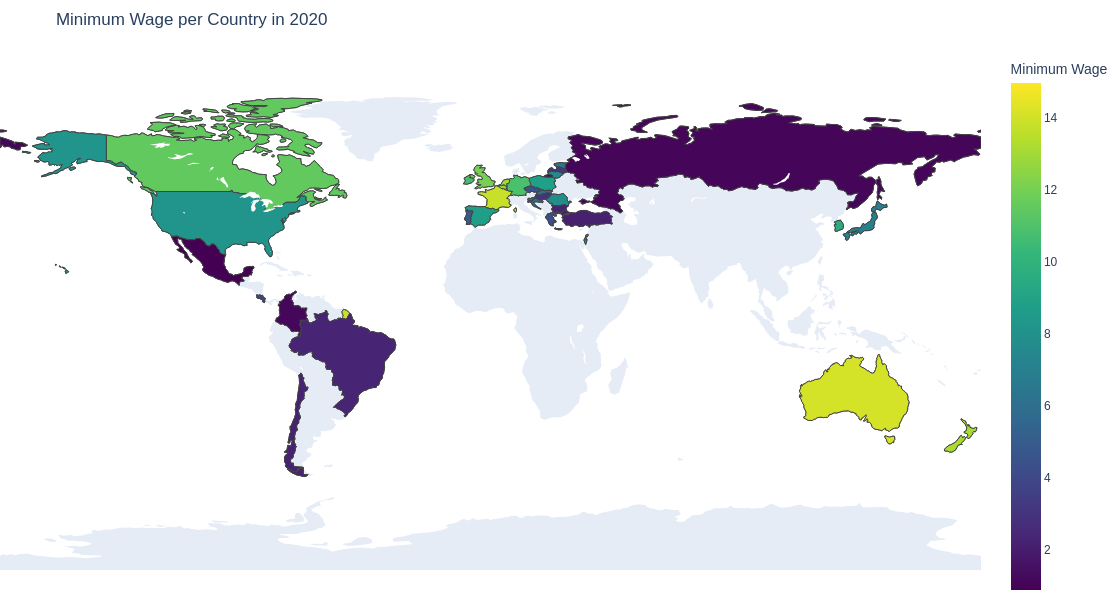

In [4]:
import plotly.express as px
import pandas as pd

# Load the data
df = pd.read_csv('minimum_wage_worldwide.csv')

# Filter the data for the year 2020
df_2020 = df[df['TIME_PERIOD'] == 2020]

# Check if necessary columns are present
required_columns = ['REF_AREA', 'OBS_VALUE']
if not all(column in df_2020.columns for column in required_columns):
    raise ValueError(f"The required columns {required_columns} are not present in the dataset.")

# Create the choropleth map
fig = px.choropleth(
    df_2020,
    locations='REF_AREA',  # Column with the country codes
    locationmode='ISO-3',  # Assuming the country codes are in ISO-3 format
    color='OBS_VALUE',  # Column with the minimum wage values
    hover_name='Reference area',  # Column to display as hover information
    color_continuous_scale='Viridis',  # Color scale for the map
    title='Minimum Wage per Country in 2020',
    labels={'OBS_VALUE': 'Minimum Wage'}
)

# Update layout for better presentation
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    margin=dict(l=0, r=0, t=50, b=0),
    height=600,
)

# Show the plot
fig.show()